In [14]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import seaborn as sb
import numpy as np
import datetime as dt
import csv
from datetime import datetime
%matplotlib inline

In [15]:
#Importing Datafile and converting to numbers
data = pd.read_csv('calendar_clean.csv')
#data['adjusted_price']=data['adjusted_price'].str.lstrip('$').astype(float)
data['date']=pd.to_datetime(data['date'])
data['weekday'] = pd.Series(data.date).dt.dayofweek

In [16]:
data.head()

,listing_id,date,available,adjusted_price,weekday
0,1941997,2019-01-18,t,428.0,4
1,1942067,2019-01-18,t,428.0,4
2,1942067,2019-01-19,t,428.0,5
3,1942067,2019-01-20,t,428.0,6
4,1942067,2019-01-21,t,428.0,0


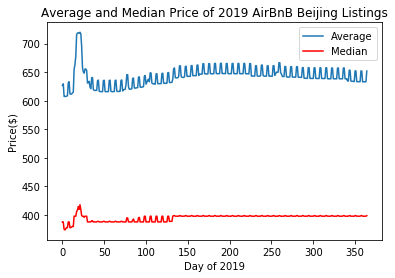

In [17]:
#Taking average/median values as well as plotting
date=[]
avg_price=[]
median_price=[]
for i in data['date'].unique():
    date.append(i)
    avg_price.append(data[data['date'] == i]['adjusted_price'].mean())
    median_price.append(data[data['date'] == i]['adjusted_price'].median())
plt.plot(range(len(avg_price)), avg_price, label= "Average")
plt.plot(range(len(avg_price)),median_price,color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2019')
plt.title('Average and Median Price of 2019 AirBnB Beijing Listings')
plt.legend()

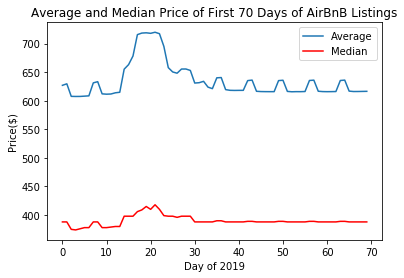

In [18]:
plt.plot(range(len(avg_price[0:70])), avg_price[0:70], label= "Average")
plt.plot(range(len(avg_price[0:70])),median_price[0:70],color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day of 2019')
plt.title('Average and Median Price of First 70 Days of AirBnB Listings')
plt.legend()

Text(0.5, 1.0, 'Average Price per Day of the Week')

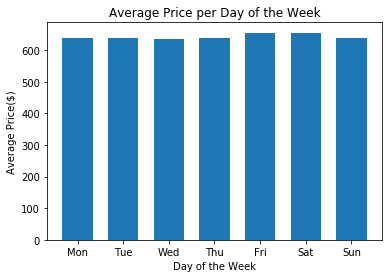

In [19]:
daily_avg_price=[]
daily_median_price=[]
b=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
    daily_avg_price.append(data[data['weekday'] == i]['adjusted_price'].mean())
    daily_median_price.append(data[data['weekday'] == i]['adjusted_price'].median())
plt.bar(range(len(daily_avg_price)),daily_avg_price,1/1.5)
plt.xticks(range(len(daily_avg_price)),b)
plt.ylabel('Average Price($)')
plt.xlabel('Day of the Week')
plt.title('Average Price per Day of the Week')

Text(0.5, 1.0, 'Median Price per Day of the Week')

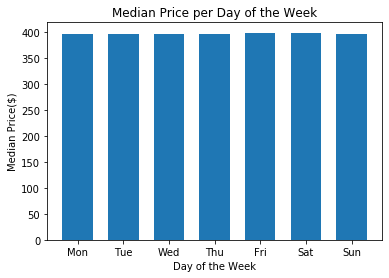

In [20]:
plt.bar(range(len(daily_avg_price)),daily_median_price,1/1.5)
plt.xticks(range(len(daily_avg_price)),b)
plt.ylabel('Median Price($)')
plt.xlabel('Day of the Week')
plt.title('Median Price per Day of the Week')

In [22]:
multiplier = []
for i in range(7):
    multiplier.append(daily_avg_price[i]/daily_avg_price[0])

In [23]:
multiplier

[1.0,
 1.0000484416343784,
 0.9997316693592295,
 1.0002911241736734,
 1.0278225252198696,
 1.02847773170652,
 1.0003339044661095]

In [25]:
pricing_data=dict.fromkeys(b)

In [26]:
for i in pricing_data:
    pricing_data[i]=[]

In [27]:
## Alternate version where 
listing_id=[]
for i in data['listing_id'].unique():
    listing_id.append(i)
    for index,j in enumerate(b):
        pricing_data[j].append(data[(data['weekday'] == index) & (data['listing_id'] == i)]['adjusted_price'].mean())


In [28]:
results = pd.DataFrame(pricing_data)
results['listing_id'] = listing_id
results_nona = results.dropna(axis = 0)
results_nona = results_nona[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'listing_id']]

In [29]:
results_nona

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,listing_id
0,368.000000,368.000000,368.000000,368.000000,428.000000,428.000000,368.000000,1941997
1,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,1942067
2,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,1941773
3,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,2022824
4,220.653846,220.653846,220.653846,220.653846,220.622642,220.653846,220.653846,2005158
...,...,...,...,...,...,...,...,...
25250,510.884615,511.000000,511.115385,511.211538,512.377358,512.750000,513.500000,31626539
25251,459.000000,459.000000,459.000000,459.000000,479.000000,479.000000,459.000000,31626609
25252,516.923077,516.923077,516.942308,516.942308,516.622642,516.326923,516.923077,31626881
25253,361.884615,361.884615,361.884615,361.884615,361.849057,361.807692,361.884615,31627081


In [30]:
results_nona.to_csv("seasonality_tomodel.csv",index=False)

In [31]:
df = pd.DataFrame({'price':avg_price})
df.to_csv("daily_price.csv",index=False)

In [32]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pylab
import scipy.stats as stats
%matplotlib inline

In [33]:
# helper function for plotting residual plots
def plot_residual(ax1, ax2, ax3, y_pred, y_real, line_label, title):
    ax1.scatter(y_pred,
                y_real,
                color='blue',
                alpha=0.6,
                label=line_label)
    ax1.set_xlabel('Predicted Y')
    ax1.set_ylabel('Real Y')
    ax1.legend(loc='best')
    ax1.set_title(title)

    ax2.scatter(y_pred,
                y_real - y_pred,
                color='green',
                marker='x',
                alpha=0.6,
                label='Residual')
    ax2.set_xlabel('Predicted Y')
    ax2.set_ylabel('Residual')

    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')

    ax2.legend(loc='best')
    ax2.set_title('Residual Plot')

    ax3.hist(y_real - y_pred, bins=30, color='green', alpha=0.7)
    ax3.set_title('Histogram of residual values')

    return ax1, ax2, ax3

In [34]:
class model:

    def __init__(self, model):
        self.model = model
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.y_pred_train = None
        self.y_pred_test = None
        self.train_score = None
        self.test_score = None
        self.train_score_log = None
        self.test_score_log = None

    def data_split(self, x, y, test_size):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=test_size)

    def score_reg(self):
        return self.train_score, self.test_score

    def score_log(self):
        self.train_score_log = metrics.r2_score(np.exp(self.y_train), np.exp(self.y_pred_train))
        self.test_score_log = metrics.r2_score(np.exp(self.y_test), np.exp(self.y_pred_test))
        return self.train_score_log, self.test_score_log

    def data_frame_convert(self):
        df_train = pd.DataFrame({'y_pred': self.y_pred_train, 'y_real': self.y_train})
        df_test = pd.DataFrame({'y_pred_test': self.y_pred_test, 'y_real_test': self.y_test})
        return self.train_score, self.test_score, df_train, df_test

    def data_frame_convert_log(self):
        df_train = pd.DataFrame({'y_pred': np.exp(self.y_pred_train), 'y_real': np.exp(self.y_train)})
        df_test = pd.DataFrame({'y_pred_test': np.exp(self.y_pred_test), 'y_real_test': np.exp(self.y_test)})
        return self.train_score_log, self.test_score_log, df_train, df_test

    def fit_model(self, x, y, test_size):
        self.data_split(x, y, test_size)
        self.model = self.model.fit(self.x_train, self.y_train)
        self.train_score = self.model.score(self.x_train, self.y_train)
        self.test_score = self.model.score(self.x_test, self.y_test)
        self.y_pred_train = self.model.predict(self.x_train)
        self.y_pred_test = self.model.predict(self.x_test)

def model_iterations(n, x, y, model_arg, log_bool=False):
    training_scores = [None]*n
    testing_scores = [None]*n

    for i in range(n):
        new_model = model(model_arg)
        new_model.fit_model(x, y, 0.3)
        training_scores[i], testing_scores[i] = new_model.score_reg() if not log_bool else new_model.score_log()

    print('Mean Train Score:', np.mean(training_scores))
    print('Mean Test Score:', np.mean(testing_scores))
    return new_model

In [37]:
data_clean = pd.read_csv('listings_clean.csv')
data_clean = data_clean.drop('latitude', axis=1)
data_clean = data_clean.drop('longitude', axis=1)
data_clean.head()

,id,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,...,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,price,price_log
0,44054,192875,-0.153088,1.983547,0.578216,1.255647,0.971227,-0.089371,0.299172,3.757594,...,0,0,0,0,0,0,1,0,839.0,6.732211
1,100213,527062,-0.281121,-0.595420,-0.278160,-0.507990,-0.534097,-0.089371,-1.825634,-0.490791,...,0,0,0,0,0,0,0,1,1198.0,7.088409
2,114384,533062,-0.281121,-0.595420,-0.278160,-0.507990,-0.534097,-0.089371,1.071829,2.450398,...,0,0,0,0,0,0,1,0,667.0,6.502790
3,114465,533062,-0.281121,-0.595420,-0.278160,-0.507990,-0.534097,-0.089371,1.071829,-0.163993,...,0,0,0,0,0,0,0,1,617.0,6.424869
4,114475,533062,-0.281121,-0.963844,-0.278160,-0.507990,-0.534097,-0.089371,1.071829,-0.490791,...,0,0,0,0,0,0,0,1,617.0,6.424869


In [38]:
# split into x and y (note that we do not include id and host_id as predictors)
x = data_clean.iloc[:, 2:-2]
y = data_clean.iloc[:, -2]
y_log = data_clean.iloc[:, -1]

In [39]:
Lin_Reg_Model = model_iterations(1, x, y, Lin_Reg(fit_intercept=True))

Mean Train Score: 0.5183161335550233
Mean Test Score: 0.5415947284803329


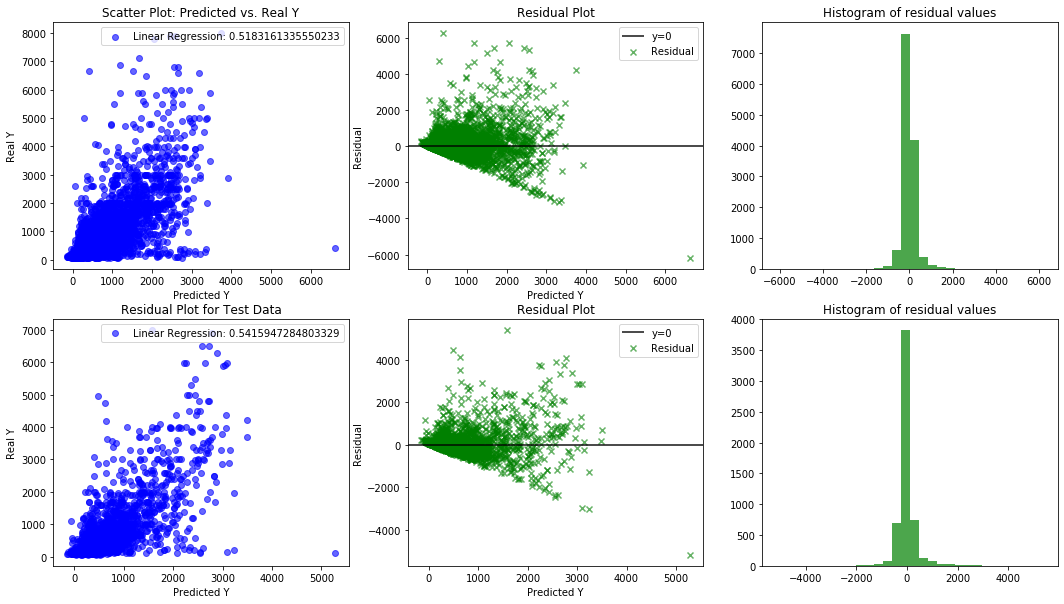

In [40]:
# plot the residuals of a linear regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

data_vals = Lin_Reg_Model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], data_vals[2]['y_pred'], data_vals[2]['y_real'], 'Linear Regression: {}'.format(data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], data_vals[3]['y_pred_test'], data_vals[3]['y_real_test'], 'Linear Regression: {}'.format(data_vals[1]), 'Residual Plot for Test Data')
plt.show()

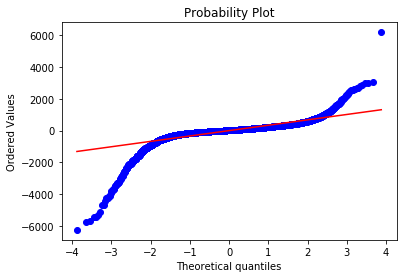

In [41]:
# qq plot for the train residuals
stats.probplot(data_vals[2]['y_pred'] - data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

In [42]:
Lin_Reg_Model_Log = model_iterations(1, x, y_log, Lin_Reg(fit_intercept=True), True)

Mean Train Score: 0.4928763001894597
Mean Test Score: 0.5197559339640119


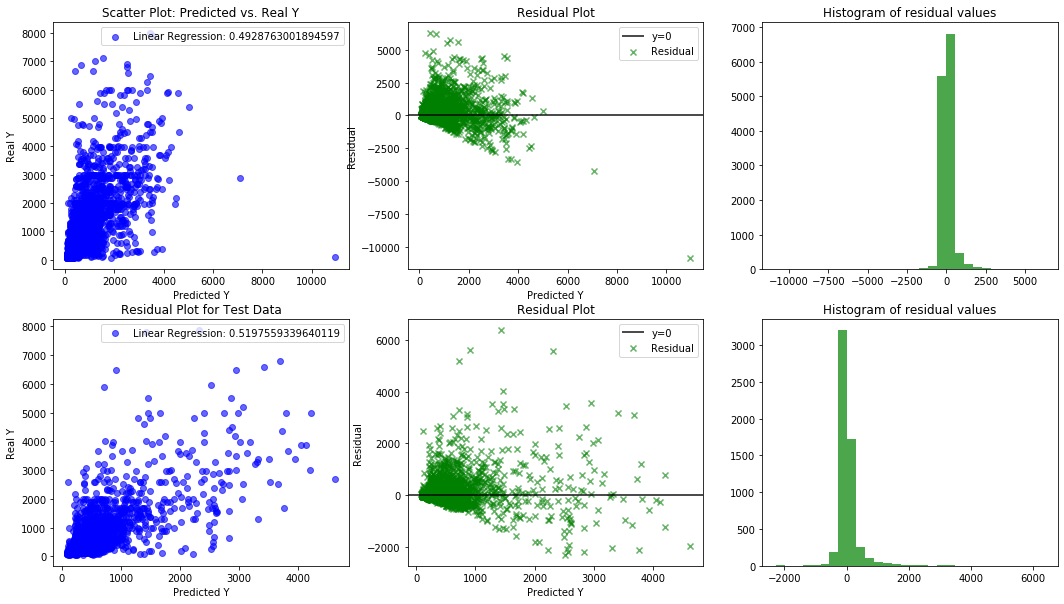

In [43]:
# plot the residuals of a linear regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

data_vals = Lin_Reg_Model_Log.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], data_vals[2]['y_pred'], data_vals[2]['y_real'], 'Linear Regression: {}'.format(data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], data_vals[3]['y_pred_test'], data_vals[3]['y_real_test'], 'Linear Regression: {}'.format(data_vals[1]), 'Residual Plot for Test Data')
plt.show()

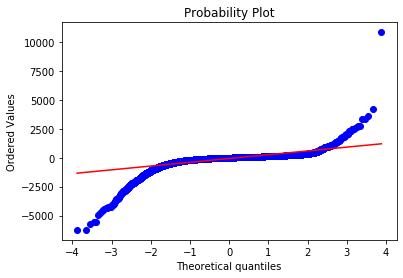

In [44]:
# qq plot for the train residuals
stats.probplot(data_vals[2]['y_pred'] - data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

In [45]:
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(5, x, y, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5))

Mean Train Score: 0.5220649839179672
Mean Test Score: 0.4936210141004553


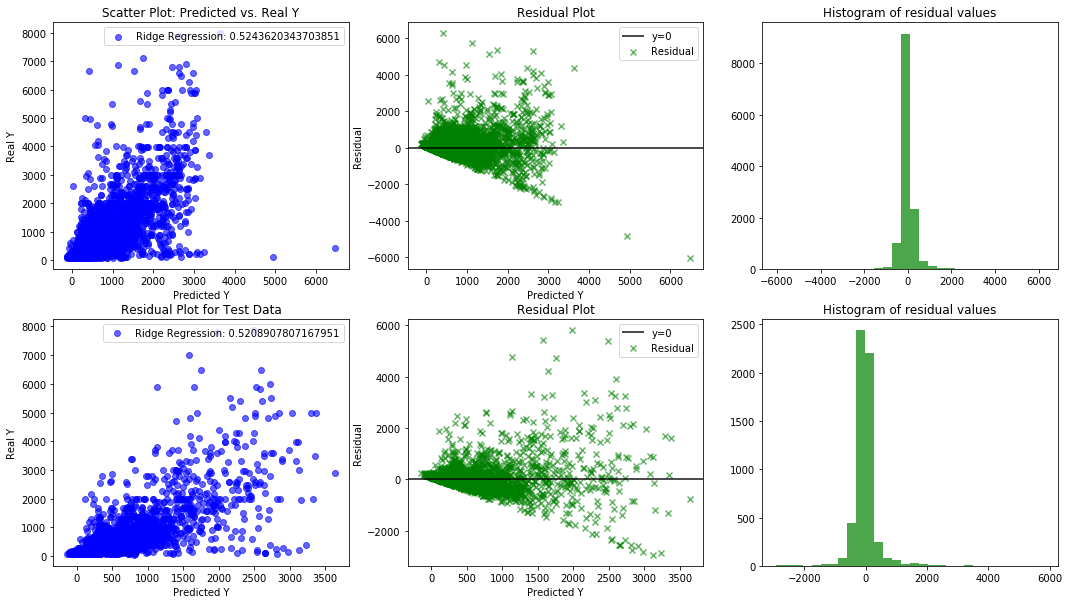

In [46]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

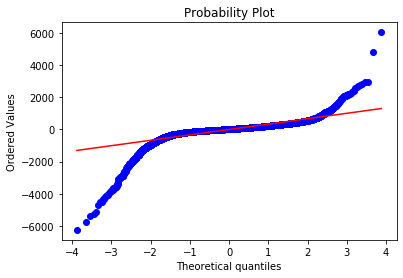

In [47]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

In [48]:
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(5, x, y_log, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5), True)

Mean Train Score: 0.493645909303084
Mean Test Score: 0.4955723036473293


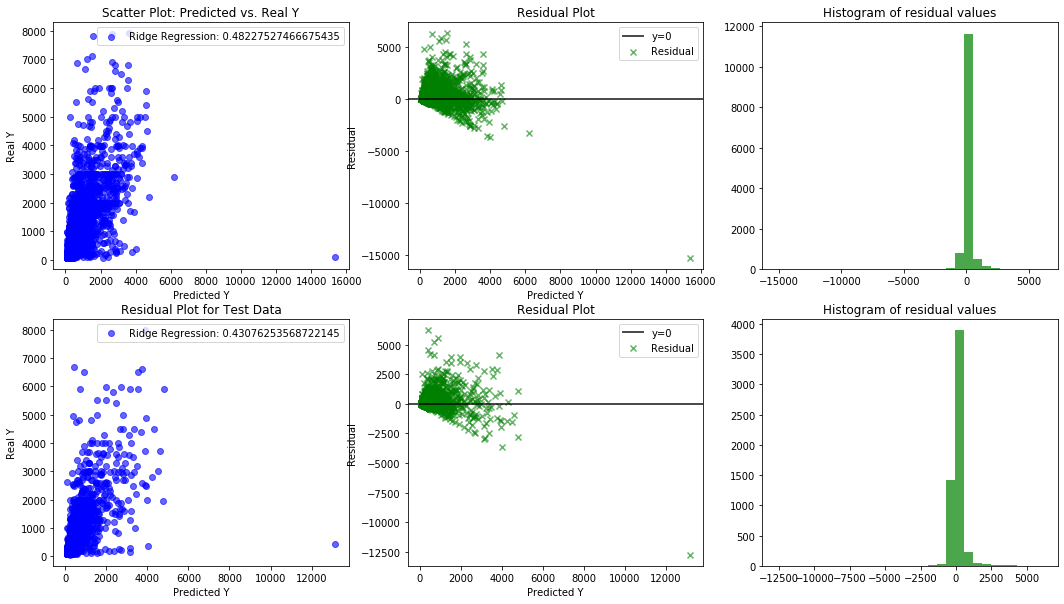

In [49]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

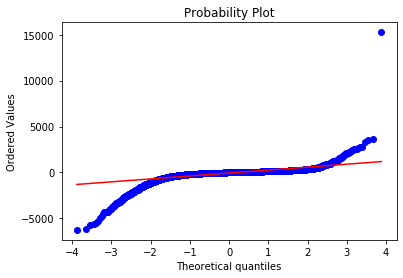

In [50]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

In [53]:
reg_params = 10.**np.linspace(-10, 5, 10)
LassoCV_model = model_iterations(5, x, y, LassoCV(alphas=reg_params, fit_intercept=True, cv=5))

/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25177719.541559458, tolerance: 416568.92465782206
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1342685.5938835144, tolerance: 386995.97337472514
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134443586.7215314, tolerance: 400202.9902052894
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: 

Mean Train Score: 0.5422471490228965
Mean Test Score: 0.42716867634640676


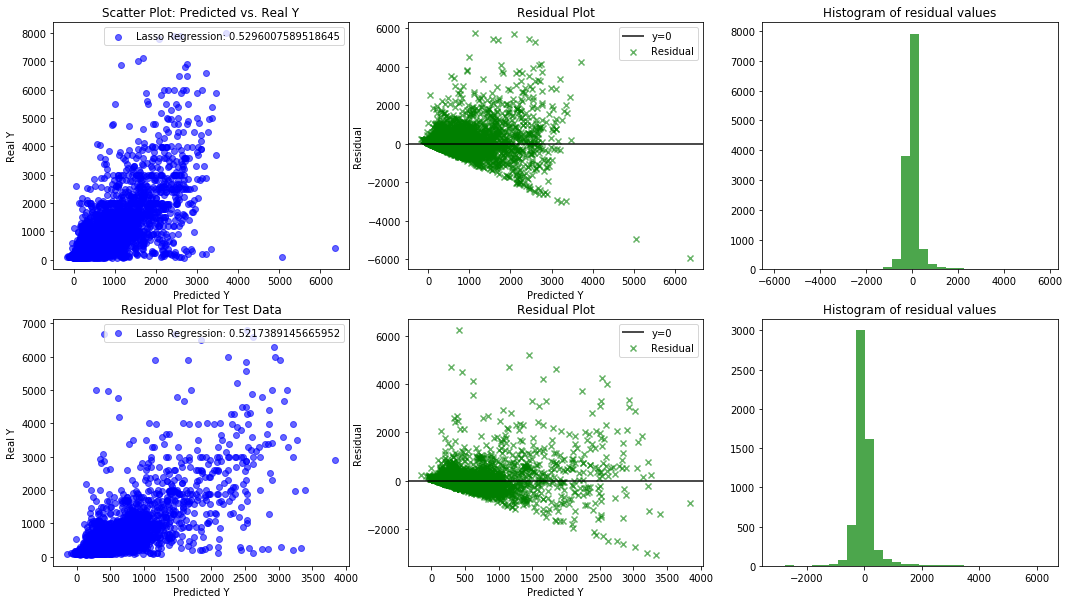

In [52]:
# plot the residuals for a lasso regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

lasso_data_vals = LassoCV_model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], lasso_data_vals[2]['y_pred'], lasso_data_vals[2]['y_real'], 'Lasso Regression: {}'.format(lasso_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], lasso_data_vals[3]['y_pred_test'], lasso_data_vals[3]['y_real_test'], 'Lasso Regression: {}'.format(lasso_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

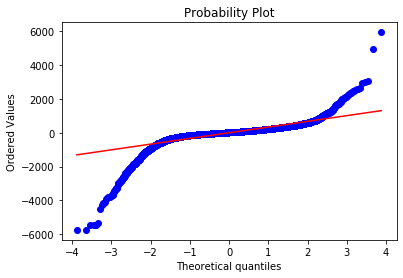

In [54]:
# qq plot for the train residuals
stats.probplot(lasso_data_vals[2]['y_pred'] - lasso_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

In [55]:
reg_params = 10.**np.linspace(-10, 5, 10)
LassoCV_model = model_iterations(5, x, y_log, LassoCV(alphas=reg_params, fit_intercept=True, cv=5), True)

/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.1525734950319, tolerance: 0.5588625786090716
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.88525578443932, tolerance: 0.5588625786090716
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.86906110686573, tolerance: 0.5588625786090716
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471:

Mean Train Score: 0.508768724794632
Mean Test Score: -7.227701905233673


/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 417.2593376662801, tolerance: 0.7171365696610378
  positive)


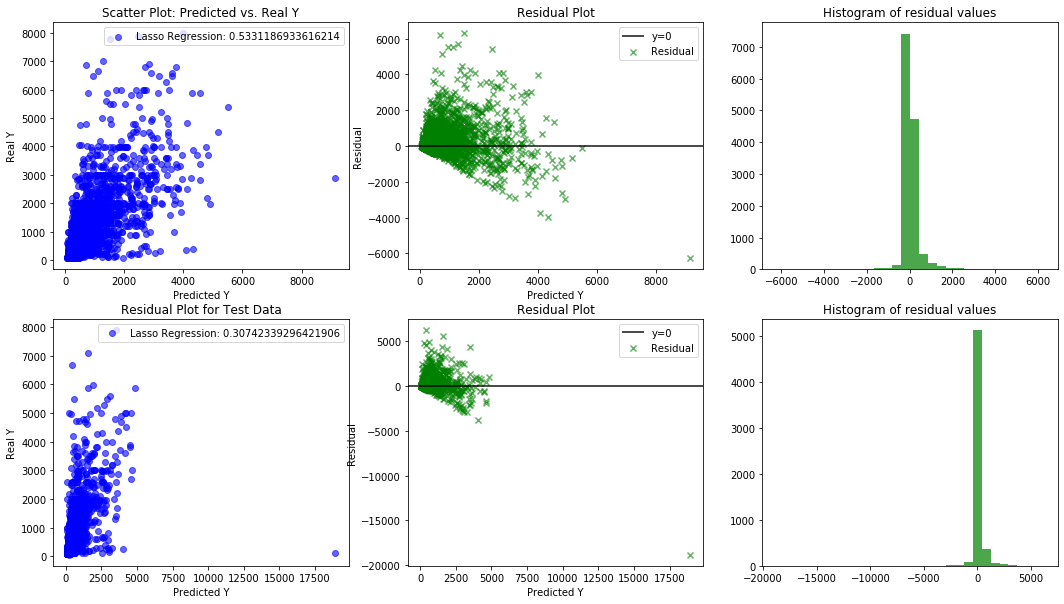

In [56]:
# plot the residuals of a lasso regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

lasso_data_vals = LassoCV_model.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], lasso_data_vals[2]['y_pred'], lasso_data_vals[2]['y_real'], 'Lasso Regression: {}'.format(lasso_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], lasso_data_vals[3]['y_pred_test'], lasso_data_vals[3]['y_real_test'], 'Lasso Regression: {}'.format(lasso_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

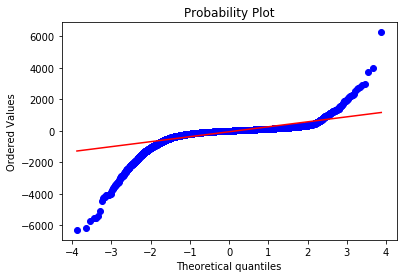

In [57]:

# qq plot for the train residuals
stats.probplot(lasso_data_vals[2]['y_pred'] - lasso_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

In [65]:
BIC = lambda n, d, RSS: n * np.log(RSS * 1. / n) + d * np.log(n)
RSS = lambda predict, actual: np.sum((predict - actual)**2)

# Ridge Polynomial Tuning Function
def best_poly_model(pred, response, max_deg, reg_params):
    # track best params
    best_degree = 0
    rss_score = 0

    # tune reg params
    reg_params = 10.**np.linspace(-10, 5, 10)

    # tune for degrees
    for degree in range(1, max_deg):
        poly_t = PolynomialFeatures(degree=degree)
        pred_expanded = poly_t.fit_transform(pred)
        ridge = RidgeCV(alphas=reg_params, fit_intercept=True, cv=5)
        ridge.fit(pred_expanded, response)
        response_hat = ridge.predict(pred_expanded)
        rss_val = RSS(response_hat, response)

        if rss_val > rss_score:
            rss_score = rss_val
            best_degree = degree

    return best_degree

def poly_ridge(x, y, degree, log_bool=None):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.90)
    poly_t = PolynomialFeatures(degree=degree)
    pred_expanded = poly_t.fit_transform(x_train)
    pred_test_expanded = poly_t.fit_transform(x_test)

    reg_params = 10.**np.linspace(-10, 5, 10)
    ridge = RidgeCV(alphas=reg_params, fit_intercept=True, cv=5)
    ridge.fit(pred_expanded, y_train)

    if not log_bool:
        train_score = ridge.score(pred_expanded, y_train)
        test_score = ridge.score(pred_test_expanded, y_test)
    if log_bool:
        train_score = metrics.r2_score(np.exp(pred_expanded), np.exp(y_train))
        test_score = metrics.r2_score(np.exp(pred_test_expanded), np.exp(y_test))

    return train_score, test_score

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.90)
best_degree = best_poly_model(x_train, y_train, 3, reg_params)
print('Best Degree:', best_degree)

/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=7.41227e-18): result may not be accurate.
  overwrite_a=False)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.26802e-17): result may not be accurate.
  overwrite_a=False)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.10183e-17): result may not be accurate.
  overwrite_a=False)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.31575e-17): result may not be accurate.
  overwrite_a=False)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.11625e-17): result may not be accurate.
  overwrite_a=False)


Best Degree: 1


In [67]:
# fit a polynomial with degree 2
scores = poly_ridge(x, y, 2)

/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.81932e-18): result may not be accurate.
  overwrite_a=False)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=6.65467e-18): result may not be accurate.
  overwrite_a=False)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.41491e-18): result may not be accurate.
  overwrite_a=False)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.44748e-17): result may not be accurate.
  overwrite_a=False)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.2834e-18): result may not be accurate.
  overwrite_a=False)


In [69]:
print('Train Score for Polynomial RidgeCV:', scores[0])
print('Test Score for Polynomial RidgeCV:', scores[1])

Train Score for Polynomial RidgeCV: 0.5009108570357471
Test Score for Polynomial RidgeCV: 0.41119155738999363


In [71]:
def median_absolute_errors(x, y, log_bool=None):
    reg_params = 10.**np.linspace(-10, 5, 10)
    models = [ linear_model.Ridge(), RidgeCV(alphas=reg_params, cv=5), linear_model.Lasso(), LassoCV(alphas=reg_params, cv=5), linear_model.ElasticNet(), linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
    model_labels = np.array(['Ridge', 'RidgeCV', 'Lasso', 'LassoCV', 'ElasticNet', 'BayesRidge', 'OMP'])
    model_errors = np.array([])

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=15)

    for model in models:
        model.fit(X_train, y_train)
        if not log_bool:
            model_err = metrics.median_absolute_error((y_test), model.predict(X_test))
            model_errors = np.append(model_errors, model_err)
        else:
            model_err = metrics.median_absolute_error(np.exp(y_test), np.exp(model.predict(X_test)))
            model_errors = np.append(model_errors, model_err)

    model_position = np.arange(model_errors.shape[0])
    models_sorted = np.argsort(model_errors)
    for i, model in enumerate(model_labels):
        print('Model {} Results: {}'.format(model_labels[i], model_errors[i]))

    plt.figure(figsize=(10,8))
    plt.bar(model_position, model_errors[models_sorted], align='center')
    plt.xticks(model_position, model_labels[models_sorted])
    plt.xlabel('Estimator')
    plt.ylabel('Median Absolute Error')
    plt.show()

/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32238002.06744647, tolerance: 339918.6915935242
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112638119.11521363, tolerance: 339918.6915935242
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112616256.05984211, tolerance: 339918.6915935242
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: Co

Model Ridge Results: 114.77368455615442
Model RidgeCV Results: 113.25099912145333
Model Lasso Results: 113.91108478409296
Model LassoCV Results: 114.60499429385476
Model ElasticNet Results: 128.13013021357347
Model BayesRidge Results: 114.55759761379772
Model OMP Results: 111.01917480676184


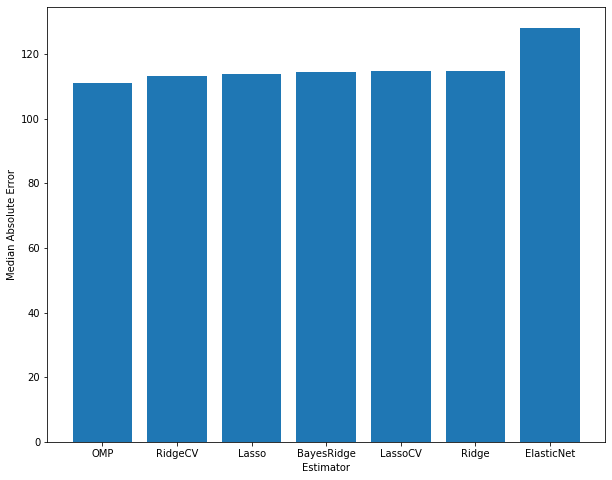

In [72]:
median_absolute_errors(x, y)


/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201.47119094604477, tolerance: 0.5297927335640168
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.77168876677752, tolerance: 0.5297927335640168
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.7577856967223, tolerance: 0.5297927335640168
  tol, rng, random, positive)
/Users/lizheng/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471:

Model Ridge Results: 90.40934946279697
Model RidgeCV Results: 90.40934946279697
Model Lasso Results: 162.88724001663167
Model LassoCV Results: 90.26677531866346
Model ElasticNet Results: 162.88724001663167
Model BayesRidge Results: 90.46129081744164
Model OMP Results: 91.43047685522322


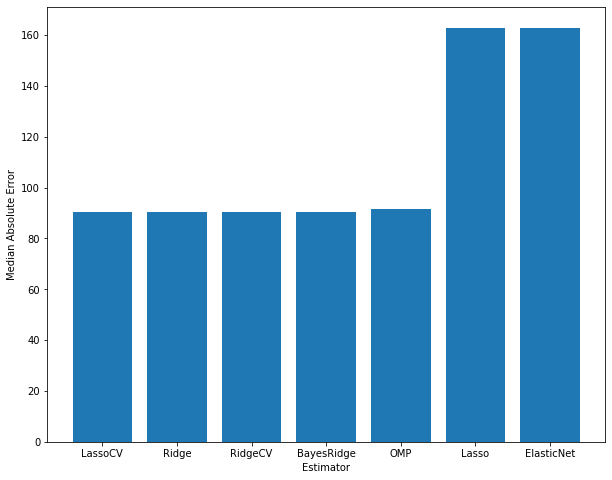

In [73]:
median_absolute_errors(x, y_log, True)